In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion=keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()

In [5]:
class_labels=['Tshirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
train_images=train_images/255.0        #scale down to grey image 
test_images=test_images/255.0

In [7]:
print(train_images.shape)                   
train_images=train_images.reshape(60000,28,28,1)      #reshape images to (T. no of images,px,px,1-dimension of grey image)

(60000, 28, 28)


In [8]:
print(test_images.shape)
test_images=test_images.reshape(10000,28,28,1)

(10000, 28, 28)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D

In [10]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=(1,1),padding='valid')) #creating convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))                                                   #creating maxpooling layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))                          #another convolution layer
model.add(MaxPooling2D(2,2))
model.add(Flatten())                                                                       #flattening the maxpolling layer for fully connected layer
model.add(Dense(units=128,activation='relu'))                                              #dense layer
model.add(Dense(units=10,activation='softmax'))                                            #output layer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels),batch_size=10)

Epoch 1/5
6000/6000 [==============================] - 64s 11ms/step - loss: 0.4100 - accuracy: 0.8500 - val_loss: 0.3078 - val_accuracy: 0.8869
Epoch 2/5
6000/6000 [==============================] - 63s 11ms/step - loss: 0.2775 - accuracy: 0.8976 - val_loss: 0.2818 - val_accuracy: 0.8968
Epoch 3/5
6000/6000 [==============================] - 66s 11ms/step - loss: 0.2348 - accuracy: 0.9124 - val_loss: 0.2632 - val_accuracy: 0.9027
Epoch 4/5
6000/6000 [==============================] - 64s 11ms/step - loss: 0.2040 - accuracy: 0.9224 - val_loss: 0.2770 - val_accuracy: 0.9057
Epoch 5/5
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1799 - accuracy: 0.9321 - val_loss: 0.2736 - val_accuracy: 0.9070


In [13]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
model_history=pd.DataFrame(model.history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.409975,0.850050,0.307763,0.8869
1,0.277488,0.897567,0.281789,0.8968
2,0.234777,0.912433,0.263187,0.9027
3,0.203950,0.922400,0.276961,0.9057
4,0.179925,0.932133,0.273638,0.9070


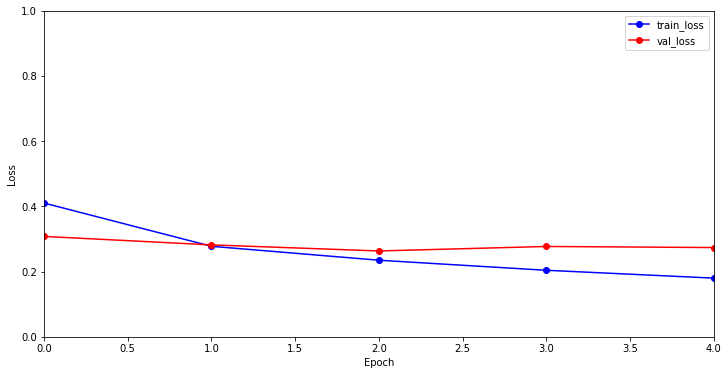

In [15]:
plt.figure(figsize=(12,6))
plt.plot(model_history.loss,label='train_loss',c='blue',marker='o',markerfacecolor='blue')
plt.plot(model_history.val_loss,label='val_loss',c='red',marker='o',markerfacecolor='red')
plt.ylim(0,1)
plt.xlim(0,4)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

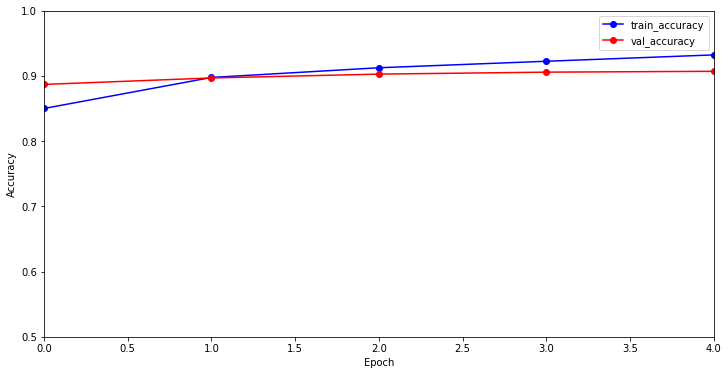

In [16]:
plt.figure(figsize=(12,6))
plt.plot(model_history.accuracy,label='train_accuracy',c='blue',marker='o',markerfacecolor='blue')
plt.plot(model_history.val_accuracy,label='val_accuracy',c='red',marker='o',markerfacecolor='red')
plt.ylim(0.5,1)
plt.xlim(0,4)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
predictions=model.predict(test_images)
predictions

array([[2.97798163e-13, 2.13221472e-11, 4.61343724e-12, ...,
        4.32066656e-07, 1.17634513e-10, 9.99999046e-01],
       [8.99392671e-06, 1.96146432e-11, 9.99990821e-01, ...,
        8.22191707e-13, 2.69135464e-10, 8.95713032e-15],
       [2.71392118e-14, 1.00000000e+00, 6.37253786e-14, ...,
        2.97164789e-27, 9.79425959e-13, 5.27528295e-23],
       ...,
       [6.11157438e-15, 1.30381108e-18, 3.11461193e-15, ...,
        2.16469963e-15, 1.00000000e+00, 4.87825320e-19],
       [1.86331087e-14, 1.00000000e+00, 7.63528035e-15, ...,
        1.97955588e-23, 1.35457694e-16, 8.79311066e-24],
       [1.17433214e-04, 9.05172556e-07, 1.22413691e-03, ...,
        1.66478232e-02, 2.63158567e-02, 3.64622509e-04]], dtype=float32)

In [25]:
print(predictions[200])                  #predictions by my model for checking each data manually      
print(np.argmax(predictions[200]))       #return index of max value

[1.1221247e-13 1.0000000e+00 2.8137744e-15 1.9717188e-11 3.2316191e-11
 3.9203809e-21 1.0075420e-10 2.7223434e-27 5.2368648e-16 5.1051368e-26]
1


In [27]:
test_labels[200]                    #actual label data

1

In [28]:
print(class_labels[1])  #image is of

Trouser


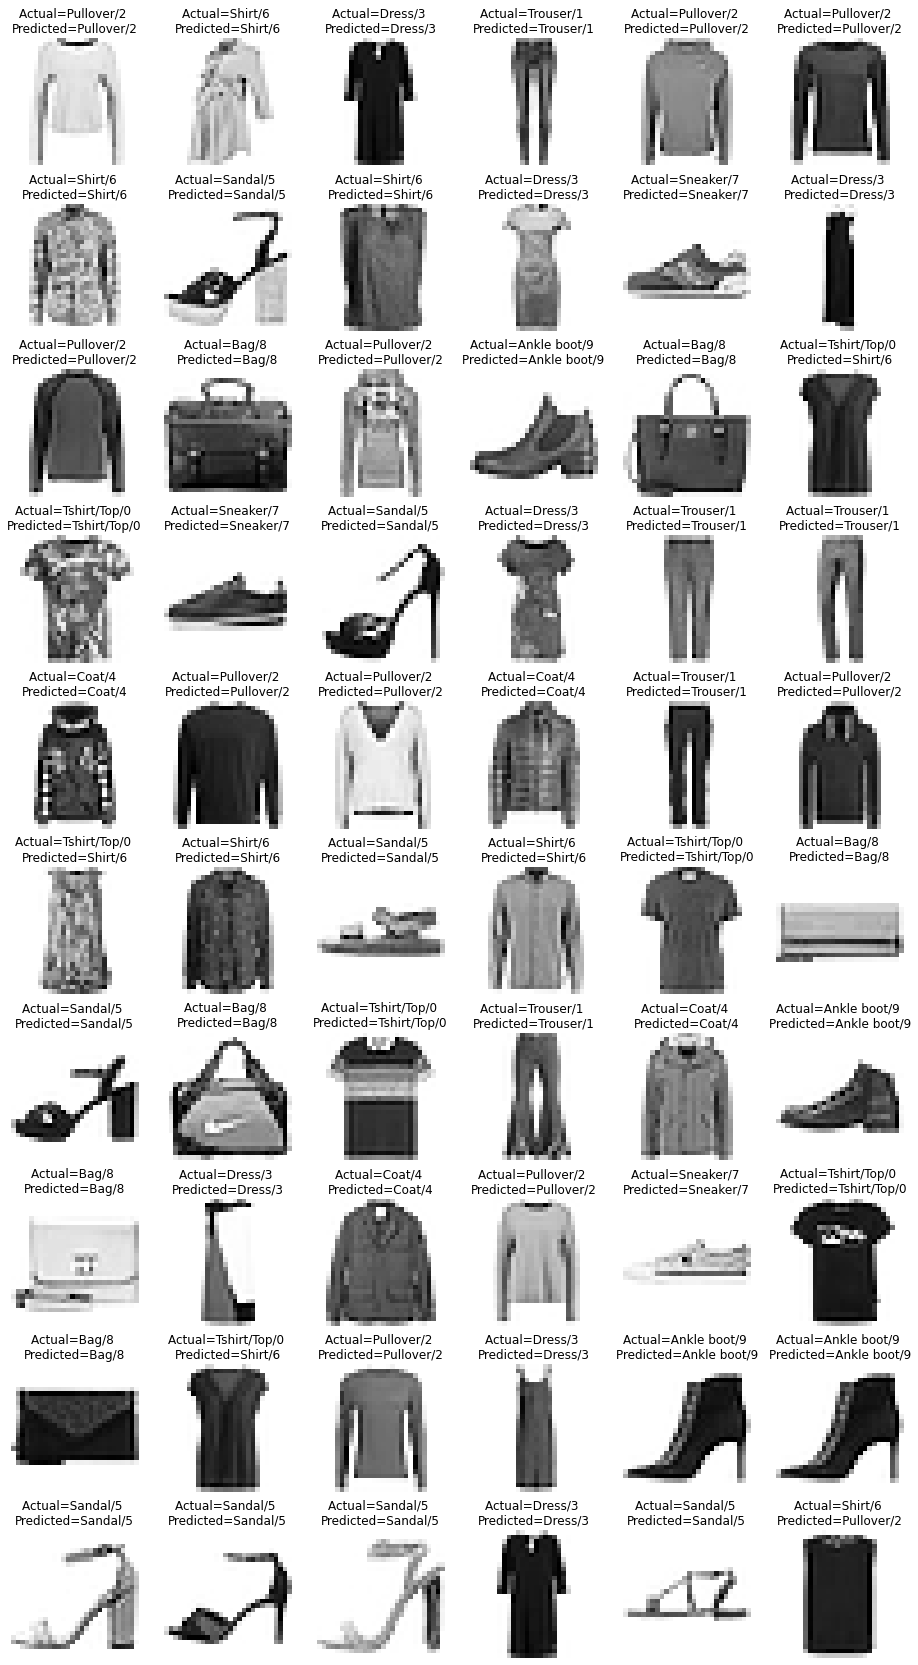

In [29]:
plt.figure(figsize=(16,30))
j=1                                      
print('\n')       #for random 60 data predictions and comparing from the test_label
for i in np.random.randint(0,1001,60):
    plt.subplot(10,6,j);j+=1
    plt.imshow(test_images[i].reshape(28,28),cmap='Greys')
    plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[test_labels[i]],test_labels[i],class_labels[np.argmax(predictions[i])],np.argmax(predictions[i])))
    plt.axis('off')